In [1]:
# import packages
import numpy as np
import networkx as nx
import community as comm_louvain
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# load data
genome3 = np.loadtxt('bestparams_3n.csv',delimiter=',')
genome4 = np.loadtxt('bestparams_4n.csv',delimiter=',')
# each row is one genome
perf3 = np.loadtxt('performance_matrix_3n.csv',delimiter=',')
perf4 = np.loadtxt('performance_matrix_4n.csv',delimiter=',')

In [46]:
# compute cosine similarity between each pair of genomes
cos3 = np.zeros((len(genome3),len(genome3)))
for genome1 in range(len(genome3)):
    for genome2 in range(len(genome3)):
        cos3[genome1,genome2] = (genome3[genome1,] @ genome3[genome2,].T) / (np.linalg.norm(genome3[genome1,])*np.linalg.norm(genome3[genome2,]))

cos4 = np.zeros((len(genome4),len(genome4)))
for genome1 in range(len(genome4)):
    for genome2 in range(len(genome4)):
        cos4[genome1,genome2] = (genome4[genome1,] @ genome4[genome2,].T) / (np.linalg.norm(genome4[genome1,])*np.linalg.norm(genome4[genome2,]))


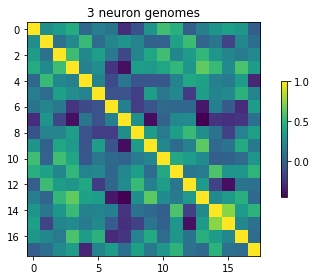

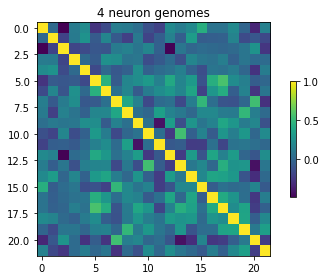

In [3]:
# see how similar the genomes are to each other
fig, ax = plt.subplots()
im = ax.imshow(cos3)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("3 neuron genomes")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(cos4)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("4 neuron genomes")
fig.tight_layout()
plt.show()

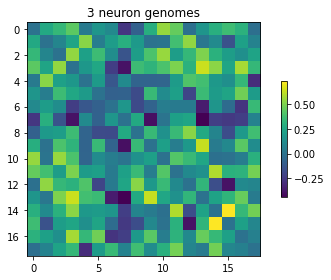

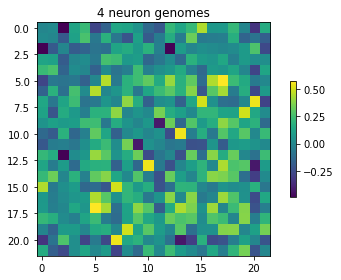

In [51]:
# again with 0s on diagonal 
# see how similar the genomes are to each other
#fill3 = np.multiply(cos3,np.fill_diagonal(cos3,0))
fig, ax = plt.subplots()
im = ax.imshow(cos3)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("3 neuron genomes")
fig.tight_layout()
plt.show()

#fill4 = np.multiply(cos3,np.fill_diagonal(cos3,0))
fig, ax = plt.subplots()
im = ax.imshow(cos4)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("4 neuron genomes")
fig.tight_layout()
plt.show()

In [4]:
# run community detection
niter = 1000
graph3 = nx.Graph(cos3)
cis3 = np.zeros((niter,len(genome3)))
graph4 = nx.Graph(cos4)
cis4 = np.zeros((niter,len(genome4)))

for i in range(niter):
    part3 = comm_louvain.best_partition(graph3)
    cis3[i,] = np.array(list(part3.values()))
    part4 = comm_louvain.best_partition(graph4)
    cis4[i,] = np.array(list(part4.values()))


In [50]:
print(np.fill_diagonal(cos4,0))
print(cos4)

None
[[ 0.00000000e+00  1.86593584e-02 -4.89184887e-01  1.32311631e-01
   2.32069027e-01 -2.65625644e-01 -1.54193989e-01  1.39157160e-01
   1.26502487e-01  5.54549022e-02 -1.24349864e-01 -1.95947620e-01
   2.19345158e-01  1.34155668e-01  2.20287744e-01  4.44426033e-01
   7.80226886e-02  8.01602327e-02  2.17203299e-01 -7.72901560e-03
  -3.29269065e-01  1.64183022e-01]
 [ 1.86593584e-02  0.00000000e+00 -1.89233443e-01  1.17421672e-01
   2.68656888e-01 -6.38987131e-02  1.90069381e-01 -6.94537946e-02
  -2.08387569e-01  1.13323341e-01 -1.84399195e-01 -4.20007931e-02
   1.67950860e-01 -4.27607132e-02  3.34315001e-01 -5.21259363e-02
  -3.95283756e-02 -2.92987518e-02  1.77270513e-01 -1.46088688e-01
  -8.60514903e-02 -1.67948712e-01]
 [-4.89184887e-01 -1.89233443e-01  0.00000000e+00 -1.78387787e-01
  -1.48127080e-01 -8.25486628e-02 -9.53727193e-02  1.30249084e-01
   1.62704842e-01  8.82372792e-02  1.90602897e-01 -3.11932510e-02
  -4.81126670e-01  9.34561643e-02  1.95655792e-04  4.00323677e-02
 

In [5]:
# get coassignment matrix
coas3 = np.zeros((len(genome3),len(genome3)))
coas4 = np.zeros((len(genome4),len(genome4)))
for i in range(len(genome3)):
    for j in range(len(genome3)):
        coas3[i,j] = (sum(cis3[ :,i]==cis3[ :,j]))/niter
        
for i in range(len(genome4)):
    for j in range(len(genome4)):
        coas4[i,j] = (sum(cis4[ :,i]==cis4[ :,j]))/niter

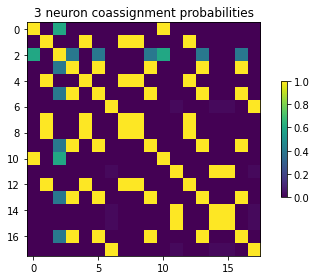

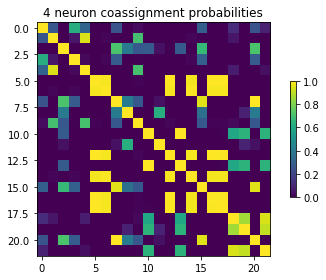

In [80]:
# visualize coassignment probabilities
fig, ax = plt.subplots()
im = ax.imshow(coas3)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("3 neuron coassignment probabilities")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(coas4)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("4 neuron coassignment probabilities")
fig.tight_layout()
plt.show()

In [6]:
# get consensus communities from coassignment matrix
comms3 = np.array(list(comm_louvain.best_partition(nx.Graph(coas3)).values()))
comms4 = np.array(list(comm_louvain.best_partition(nx.Graph(coas4)).values()))

In [7]:
# reorder similiarity matrix so that genomes in same community are adjacent
## come back to this later because i'm not doing it right rn
cos_order3 = np.zeros((len(genome3),len(genome3)))
cos_order4 = np.zeros((len(genome4),len(genome4)))
for ci1 in range(max(np.unique(comms3))+1):
    nci1 = len(np.where(comms3==ci1)[0])
    print(nci1)
    for ci2 in range(max(np.unique(comms3))+1):
        nci2 = len(np.where(comms3==ci2)[0])
        print(nci2)
        cos3[np.where(comms3==ci1)[0],np.where(comms3==ci2)[0]]

3
3
3
5


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (5,) 

In [8]:
# reshape performance matrix
pmat3 = np.zeros((len(genome3),len(genome3)))
pmat4 = np.zeros((len(genome4),len(genome4)))
for n in range(len(perf3)):
    i = int(perf3[n][0])
    j = int(perf3[n][1])
    p = perf3[n][2]
    pmat3[i,j] = p
    pmat3[j,i] = p
    
for n in range(len(perf4)):
    i = int(perf4[n][0])
    j = int(perf4[n][1])
    p = perf4[n][2]
    pmat4[i,j] = p
    pmat4[j,i] = p

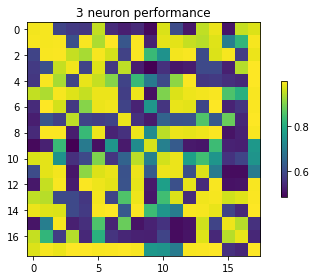

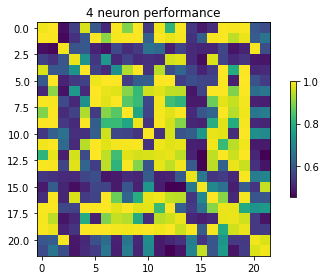

In [37]:
# plot performance 
fig, ax = plt.subplots()
im = ax.imshow(pmat3)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("3 neuron performance")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(pmat4)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("4 neuron performance")
fig.tight_layout()
plt.show()

In [9]:
# do genomes perform better with genomes inside of their community or not
# could look at correlation between coassignment probability and performance
n3 = int((len(genome3)**2 - len(genome3))/2)
n4 = int((len(genome4)**2 - len(genome4))/2)
x3 = coas3[np.triu_indices(len(genome3),k=1)]
x4 = coas4[np.triu_indices(len(genome4),k=1)]
y3 = pmat3[np.triu_indices(len(genome3),k=1)]
y4 = pmat4[np.triu_indices(len(genome4),k=1)]
res3 = pearsonr(x3,y3)
res4 = pearsonr(x4,y4)

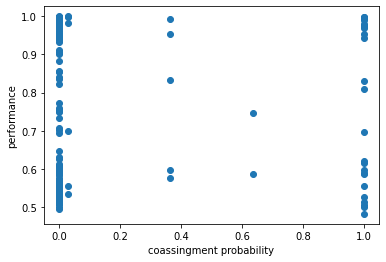

In [10]:
plt.scatter(x3,y3)
plt.xlabel('coassingment probability')
plt.ylabel('performance')
plt.show()
#plt.savefig('coas_perf_3n.png')

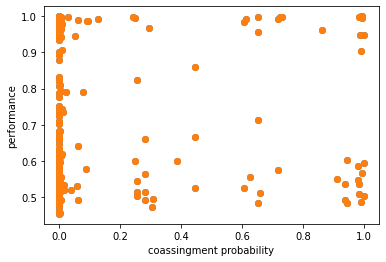

In [12]:
plt.scatter(x4,y4)
plt.xlabel('coassingment probability')
plt.ylabel('performance')
plt.savefig('coas_perf_4n.png')
plt.show()

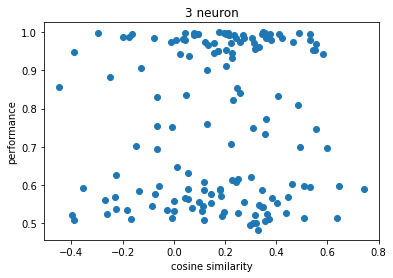

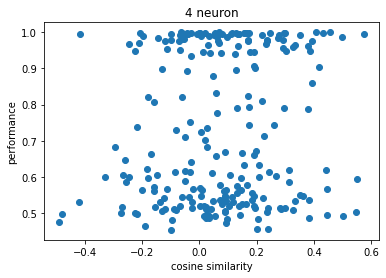

In [13]:
# correlation between cosine similarity and performance
x3 = cos3[np.triu_indices(len(genome3),k=1)]
x4 = cos4[np.triu_indices(len(genome4),k=1)]
plt.scatter(x3,y3)
plt.title('3 neuron')
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.show()
plt.scatter(x4,y4)
plt.title('4 neuron')
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.show()
# actually look at communities

In [14]:
# plot performance against whether a pair of circuits are in same consensus community
samecomm3 = np.zeros((len(genome3),len(genome3)))
for i in range(len(genome3)):
    for j in range(len(genome3)):
        if comms3[i]==comms3[j]:
            samecomm3[i,j] = 1
# vectorize to get color labels
color3 = samecomm3[np.triu_indices(len(genome3),k=1)]
samecomm4 = np.zeros((len(genome4),len(genome4)))
for i in range(len(genome4)):
    for j in range(len(genome4)):
        if comms4[i]==comms4[j]:
            samecomm4[i,j] = 1
color4 = samecomm4[np.triu_indices(len(genome4),k=1)]

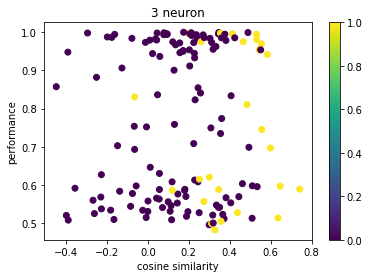

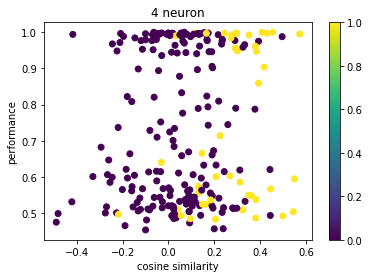

In [15]:
plt.scatter(x3,y3,c=color3)
plt.colorbar()
plt.title('3 neuron')
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.show()
plt.scatter(x4,y4,c=color4)
plt.colorbar()
plt.title('4 neuron')
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.show()

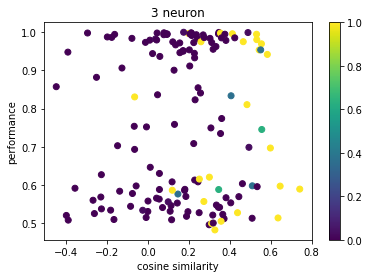

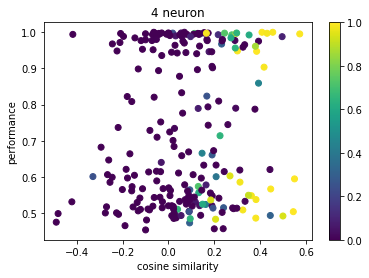

In [16]:
# plot performance against similarity with color is coassignment probability
colorco3 = coas3[np.triu_indices(len(genome3),k=1)]
colorco4 = coas4[np.triu_indices(len(genome4),k=1)]
plt.scatter(x3,y3,c=colorco3)
plt.colorbar()
plt.title('3 neuron')
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.show()
plt.scatter(x4,y4,c=colorco4)
plt.colorbar()
plt.title('4 neuron')
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.show()

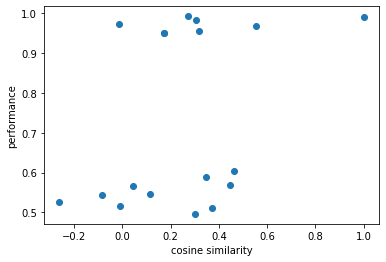

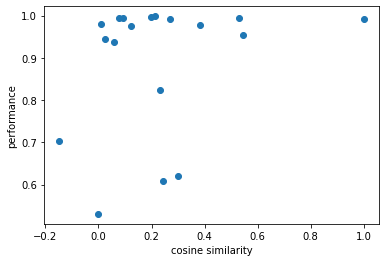

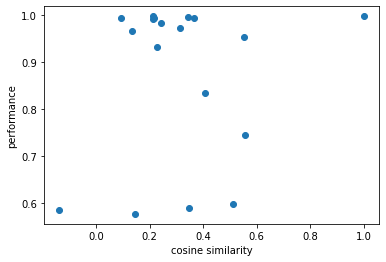

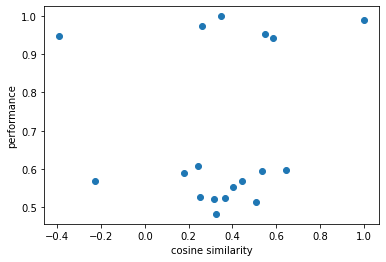

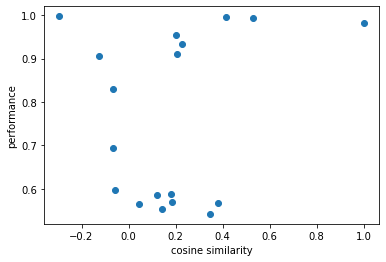

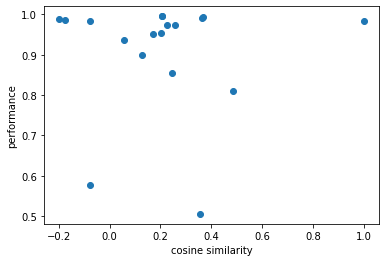

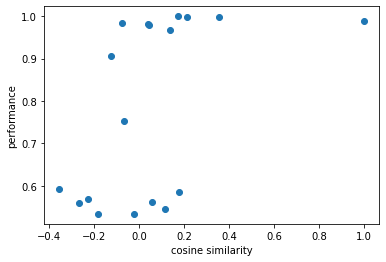

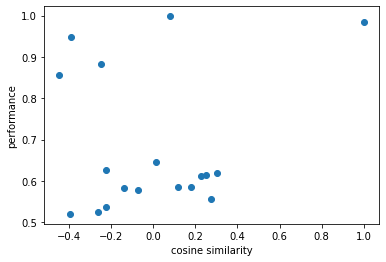

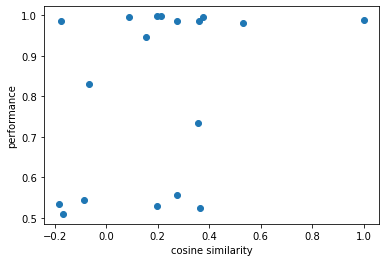

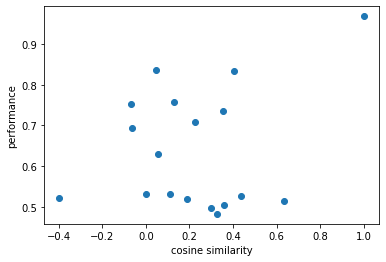

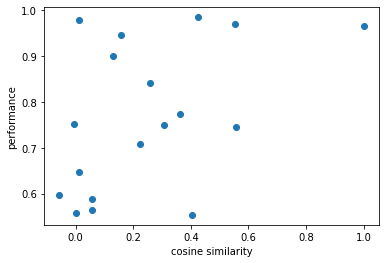

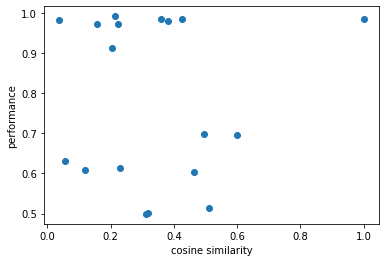

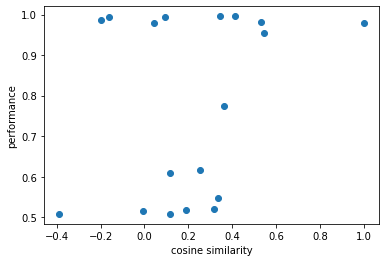

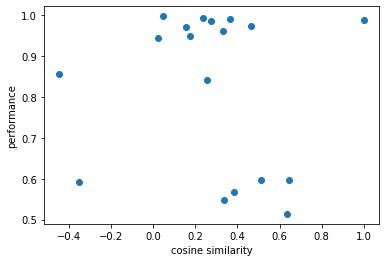

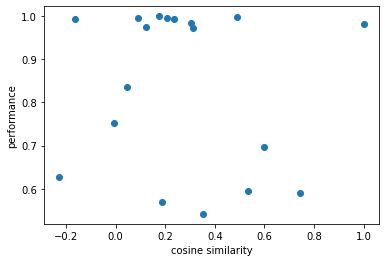

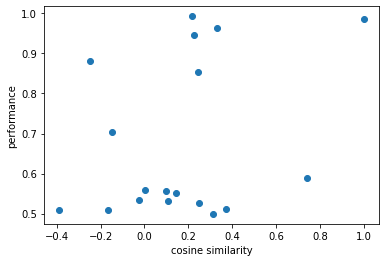

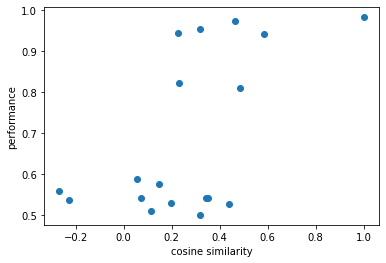

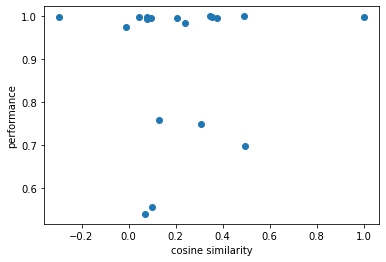

In [178]:
# for each neuron, plot the cosine similarity and performance with every other neuron
for n in range(len(genome3)):
    plt.scatter(cos3[n,:],pmat3[n,:])
    plt.xlabel('cosine similarity')
    plt.ylabel('performance')
    plt.show()

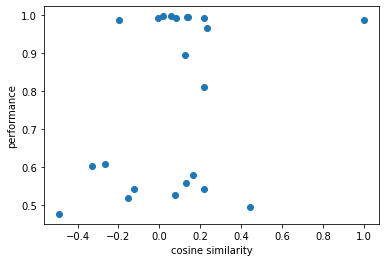

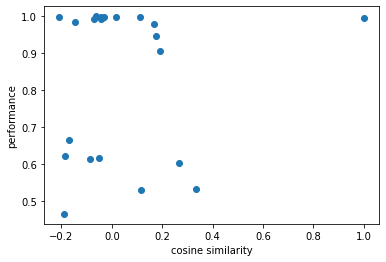

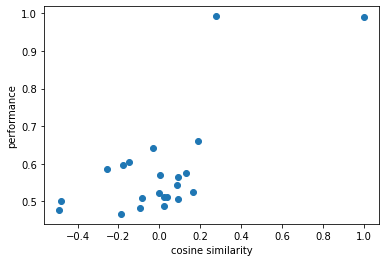

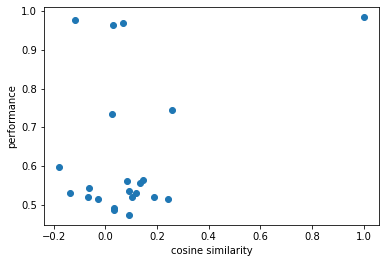

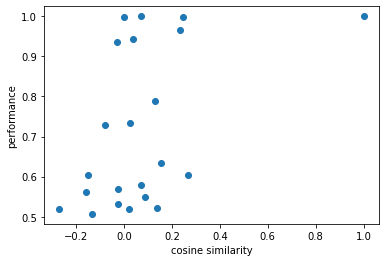

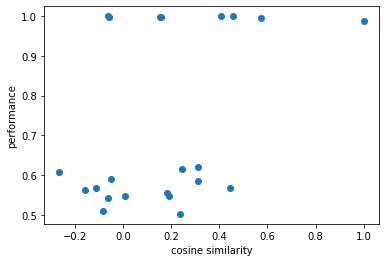

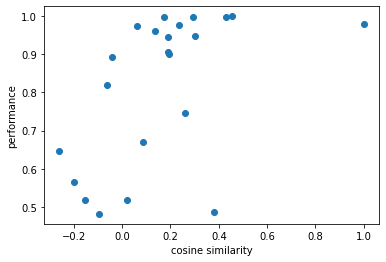

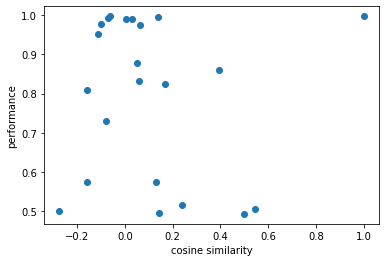

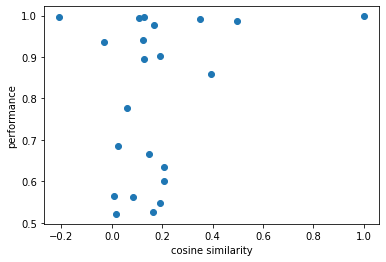

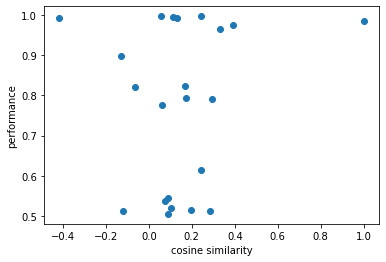

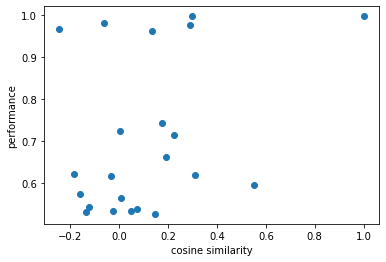

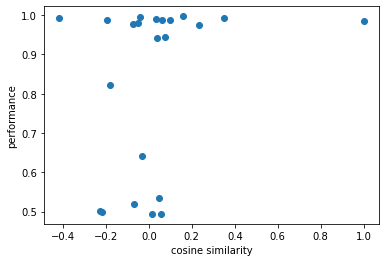

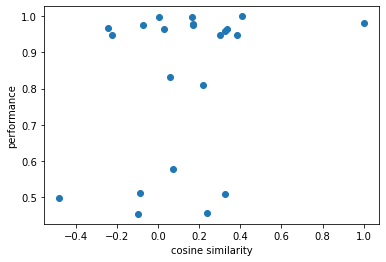

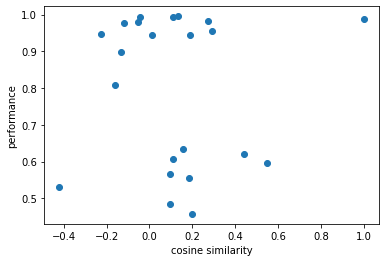

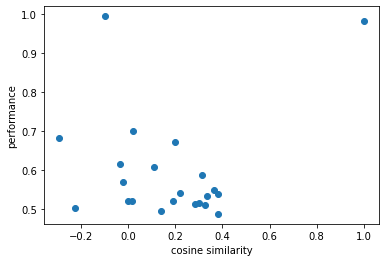

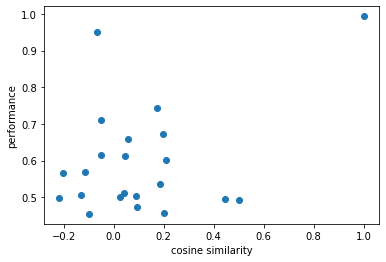

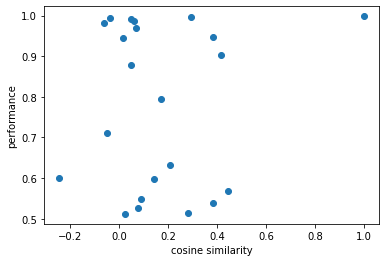

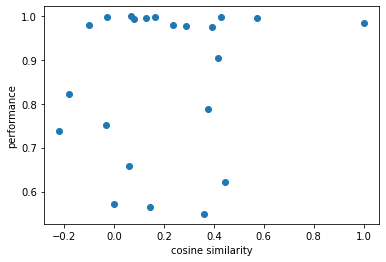

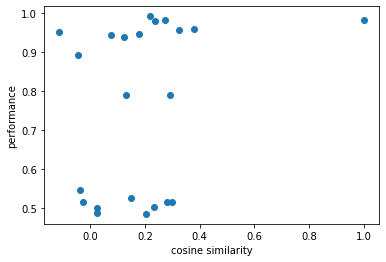

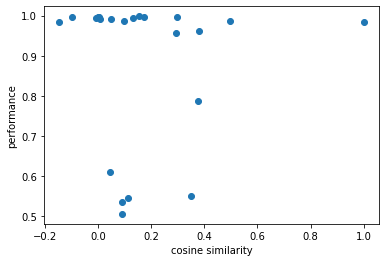

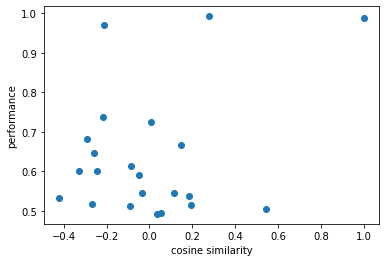

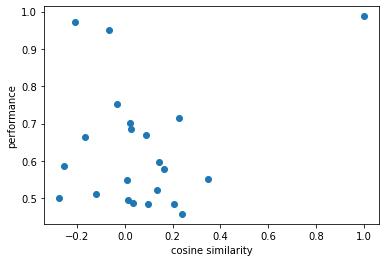

In [176]:
for n in range(len(genome4)):
    plt.scatter(cos4[n,:],pmat4[n,:])
    plt.xlabel('cosine similarity')
    plt.ylabel('performance')
    plt.show()

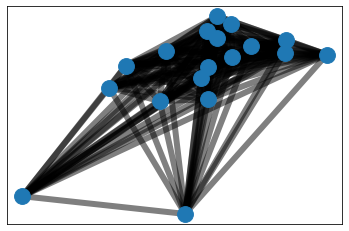

In [28]:
# use spring embedded graph derived from cosine similarity to see which
import networkx as nx
g3 = nx.Graph(cos3)
pos = nx.spring_layout(g3)
nx.draw_networkx_nodes(g3, pos, node_size=250)
# draw edges
elarge = [(u, v) for (u, v, d) in g3.edges(data=True) if d["weight"] > 0.3]
esmall = [(u, v) for (u, v, d) in g3.edges(data=True) if d["weight"] <= 0.3]
nx.draw_networkx_edges(g3, pos, edgelist=g3.edges(), width=6, alpha=0.5)
plt.show()
# circuits 6 and 7 are most extreme

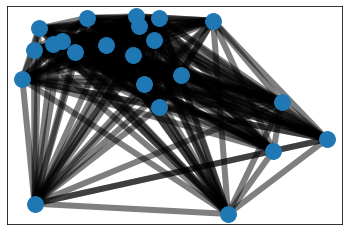

In [24]:
g4 = nx.Graph(cos4)
pos = nx.spring_layout(g4)
nx.draw_networkx_nodes(g4, pos, node_size=250)
# draw edges
elarge = [(u, v) for (u, v, d) in g4.edges(data=True) if d["weight"] > 0.3]
esmall = [(u, v) for (u, v, d) in g4.edges(data=True) if d["weight"] <= 0.3]
nx.draw_networkx_edges(g4, pos, edgelist=g4.edges(), width=6, alpha=0.5)
plt.show()
# 20, 11, 2, 7, 15

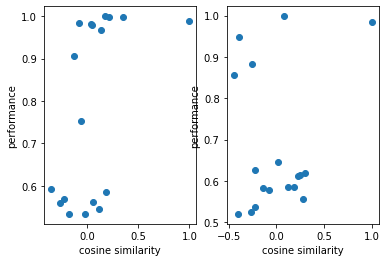

In [31]:
plt.subplot(1,2,1)
plt.scatter(cos3[6,:],pmat3[6,:])
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.subplot(1,2,2)
plt.scatter(cos3[7,:],pmat3[7,:])
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.show()

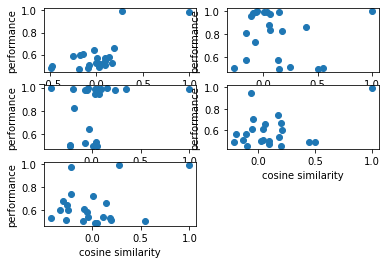

In [34]:
plt.subplot(3,2,1)
plt.scatter(cos4[2,:],pmat4[2,:])
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.subplot(3,2,2)
plt.scatter(cos4[7,:],pmat4[7,:])
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.subplot(3,2,3)
plt.scatter(cos4[11,:],pmat4[11,:])
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.subplot(3,2,4)
plt.scatter(cos4[15,:],pmat4[15,:])
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.subplot(3,2,5)
plt.scatter(cos4[20,:],pmat4[20,:])
plt.xlabel('cosine similarity')
plt.ylabel('performance')
plt.show()

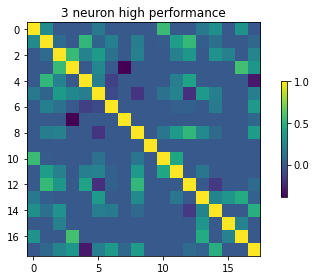

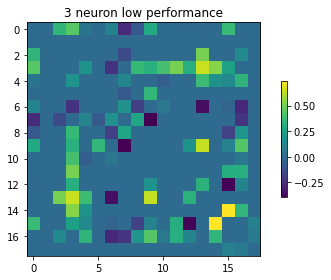

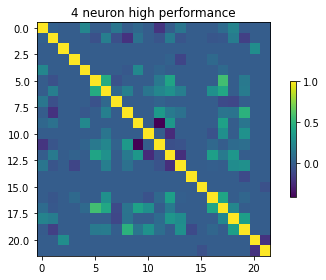

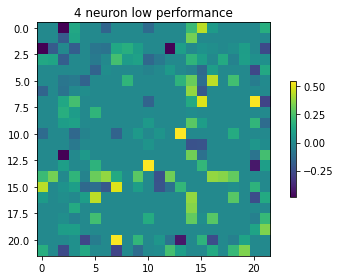

In [40]:
fig, ax = plt.subplots()
im = ax.imshow((pmat3>0.9)*cos3)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("3 neuron high performance")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
im = ax.imshow((pmat3<= 0.6)*cos3)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("3 neuron low performance")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
im = ax.imshow((pmat4>0.9)*cos4)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("4 neuron high performance")
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
im = ax.imshow((pmat4<=0.6)*cos4)
cbar = ax.figure.colorbar(im, 
                          ax = ax,
                          shrink=0.5 )
ax.set_title("4 neuron low performance")
fig.tight_layout()
plt.show()

In [52]:
comms3

array([0, 2, 0, 3, 2, 3, 4, 2, 2, 3, 0, 1, 2, 3, 1, 1, 3, 4])